In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import normalize
# from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor



from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [518]:
# look at the file
with open('2019-10-13_ciannovostroyki.csv', 'r') as file:
    for i in range(10):
        print(file.readline())

sep=;

Код;Категория;Название;Тип продажи;Объект продажи;Общая площадь;Жилая площадь;Площадь кухни;Этаж;Этажей в доме;Лифт пассажирский (кол-во);Лифт грузовой (кол-во);Год строительства;Балкон/лоджия;Мусоропровод;Телефон;Парковка;Количество комнат;Тип дома;Название дома (ЖК);Высота потолков;Кол-во раздельных санузлов;Кол-во совмещенных санузлов;Ремонт;Вид из окон;Расстояние до метро;Кол-во квартир в доме;Адрес;Текст объявления;Стоимость;Id Пользователя;ФИО продавца;Телефон продавца;Признак актуальности;Ссылка на объявление;Ссылки на картинки;Дата обновления;Регион Циан

12034729;Недвижимость в Ногинске/Продажа/Продажа 1-комнатных квартир в Ногинском районе/Электроугли/Носовихинское шоссе/улица Маяковского;1-комн. квартира, 42.2 м2;Свободная продажа, Возможна ипотека;Новостройка;"=""42.2""";"=""19.9""";"=""11.0""";2;3;;;;;Нет;Нет;;1;Кирпичный;ЖК «Маяковского»;;1;;;Во двор;;;Московская область,Богородский городской округ,Электроугли,улица Маяковского,6;Продается однокомнатная квартира в 

In [4]:
cian_data_full = pd.read_csv('2019-10-13_ciannovostroyki.csv', sep=';',
                             skiprows=1, encoding='cp1251')

In [64]:
cian_data_full.head(3)

,Код,Категория,Название,Тип продажи,Объект продажи,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,...,Текст объявления,Стоимость,Id Пользователя,ФИО продавца,Телефон продавца,Признак актуальности,Ссылка на объявление,Ссылки на картинки,Дата обновления,Регион Циан
0,12034729,Недвижимость в Ногинске/Продажа/Продажа 1-комн...,"1-комн. квартира, 42.2 м2","Свободная продажа, Возможна ипотека",Новостройка,"=""42.2""","=""19.9""","=""11.0""",2,3,...,Продается однокомнатная квартира в новостройке...,2850000,277143.0,NaN,7.965219e+10,Опубликовано,https://noginsk.cian.ru/sale/flat/12034729/,https://cdn-p.cian.site/images/4/892/911/novos...,08.10.2019 13:56:39,Богородский
1,12695191,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 70.03 м2",", Возможна ипотека",Новостройка,"=""70.03""","=""41.8""","=""13.7""",2,17,...,Продается просторная двухкомнатная квартира 70...,7073030,389766.0,ИНКОМ-Новостройки,7.495163e+10,Опубликовано,https://www.cian.ru/sale/flat/12695191/,https://cdn-p.cian.site/images/3/824/736/novos...,11.10.2019 9:25:04,Москва
2,12722545,Недвижимость в Москве/Продажа/Продажа 3-комнат...,"3-комн. квартира, 76.47 м2",", Возможна ипотека",Новостройка,"=""76.47""","=""43.4""","=""11.2""",11,17,...,"Продается трехкомнатная квартира 76,47 кв.м с ...",7799940,389766.0,ИНКОМ-Новостройки,7.495163e+10,Опубликовано,https://www.cian.ru/sale/flat/12722545/,https://cdn-p.cian.site/images2/5/690/176/novo...,11.10.2019 6:45:06,Москва


In [66]:
cian_data_full.shape

(37400, 38)

In [59]:
cian_data_full.duplicated().sum()

93

In [67]:
cian_data_full.drop_duplicates(inplace=True)

In [68]:
cian_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37307 entries, 0 to 37399
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Код                          37307 non-null  int64  
 1   Категория                    37307 non-null  object 
 2   Название                     37307 non-null  object 
 3   Тип продажи                  36703 non-null  object 
 4   Объект продажи               37307 non-null  object 
 5   Общая площадь                37307 non-null  object 
 6   Жилая площадь                37307 non-null  object 
 7   Площадь кухни                37307 non-null  object 
 8   Этаж                         37307 non-null  int64  
 9   Этажей в доме                37307 non-null  int64  
 10  Лифт пассажирский (кол-во)   35891 non-null  float64
 11  Лифт грузовой (кол-во)       35610 non-null  float64
 12  Год строительства            257 non-null    float64
 13  Балкон/лоджия   

In [69]:
# How much missing in percent
(cian_data_full.isna().sum() / cian_data_full.shape[0]) * 100 

Код                              0.000000
Категория                        0.000000
Название                         0.000000
Тип продажи                      1.618999
Объект продажи                   0.000000
Общая площадь                    0.000000
Жилая площадь                    0.000000
Площадь кухни                    0.000000
Этаж                             0.000000
Этажей в доме                    0.000000
Лифт пассажирский (кол-во)       3.795534
Лифт грузовой (кол-во)           4.548744
Год строительства               99.311121
Балкон/лоджия                   81.679041
Мусоропровод                     0.000000
Телефон                          0.000000
Парковка                        11.413408
Количество комнат                6.497440
Тип дома                         0.694240
Название дома (ЖК)               0.544134
Высота потолков                 55.817943
Кол-во раздельных санузлов      22.419385
Кол-во совмещенных санузлов    100.000000
Ремонт                          98

In [70]:
missing_percents = (cian_data_full.isna().sum() / cian_data_full.shape[0]) * 100
drop_columns = missing_percents[missing_percents > 70].index.to_list()
drop_columns

['Год строительства',
 'Балкон/лоджия',
 'Кол-во совмещенных санузлов',
 'Ремонт',
 'Кол-во квартир в доме']

In [71]:
# How much unique values. Total - 37400 entries.
for colname in cian_data_full.columns:
    print(f'{colname} : {len(cian_data_full[colname].unique())}')

Код : 37307
Категория : 3650
Название : 7211
Тип продажи : 8
Объект продажи : 2
Общая площадь : 4603
Жилая площадь : 731
Площадь кухни : 371
Этаж : 68
Этажей в доме : 65
Лифт пассажирский (кол-во) : 13
Лифт грузовой (кол-во) : 13
Год строительства : 58
Балкон/лоджия : 3
Мусоропровод : 2
Телефон : 2
Парковка : 4
Количество комнат : 7
Тип дома : 6
Название дома (ЖК) : 777
Высота потолков : 67
Кол-во раздельных санузлов : 6
Кол-во совмещенных санузлов : 1
Ремонт : 5
Вид из окон : 4
Расстояние до метро : 139
Кол-во квартир в доме : 343
Адрес : 2340
Текст объявления : 27209
Стоимость : 30013
Id Пользователя : 2800
ФИО продавца : 1146
Телефон продавца : 2921
Признак актуальности : 3
Ссылка на объявление : 37307
Ссылки на картинки : 33055
Дата обновления : 11467
Регион Циан : 60


In [72]:
drop_columns.extend(['Код', 'Текст объявления', 'Ссылка на объявление', 
                     'Ссылки на картинки', 'Телефон продавца', 'Id Пользователя', 
                     'Категория', 'Название'])

In [73]:
drop_columns

['Год строительства',
 'Балкон/лоджия',
 'Кол-во совмещенных санузлов',
 'Ремонт',
 'Кол-во квартир в доме',
 'Код',
 'Текст объявления',
 'Ссылка на объявление',
 'Ссылки на картинки',
 'Телефон продавца',
 'Id Пользователя',
 'Категория',
 'Название']

In [74]:
cian_data = cian_data_full.drop(drop_columns, axis=1)

### Look at features

In [75]:
cian_data.head().T

,0,1,2,3,4
Тип продажи,"Свободная продажа, Возможна ипотека",", Возможна ипотека",", Возможна ипотека",NaN,", Возможна ипотека"
Объект продажи,Новостройка,Новостройка,Новостройка,Новостройка,Новостройка
Общая площадь,"=""42.2""","=""70.03""","=""76.47""","=""60.0""","=""65.2"""
Жилая площадь,"=""19.9""","=""41.8""","=""43.4""","=""38.0""","="""""
Площадь кухни,"=""11.0""","=""13.7""","=""11.2""","=""12.0""","="""""
Этаж,2,2,11,5,2
Этажей в доме,3,17,17,20,5
Лифт пассажирский (кол-во),NaN,1,1,2,0
Лифт грузовой (кол-во),NaN,1,1,2,1
Мусоропровод,Нет,Да,Да,Нет,Нет


In [76]:
cian_data['Тип продажи'].str.split(',', expand=True)[0].value_counts()

Долевое участие (214-ФЗ)    29156
                             4052
Свободная продажа            3451
Альтернатива                   44
Name: 0, dtype: int64

In [77]:
cian_data['Тип продажи'].str.split(',', expand=True)[1].value_counts()

 Возможна ипотека    36291
Name: 1, dtype: int64

In [78]:
# for features [Общая площадь, Жилая площадь, Площадь кухни]
cian_data['Общая площадь'].str.strip('=\"').astype('float')

0         42.20
1         70.03
2         76.47
3         60.00
4         65.20
          ...  
37395     62.50
37396     80.40
37397     84.00
37398    104.90
37399     72.71
Name: Общая площадь, Length: 37307, dtype: float64

In [79]:
cian_data['Парковка'].value_counts()

подземная     15653
Неизвестно    15145
Наземная       2251
Name: Парковка, dtype: int64

In [80]:
cian_data['Высота потолков'].value_counts()
# 99.9 meters !?

3.000     2772
2.650     2054
2.700     1612
2.800     1526
3.100     1005
          ... 
6.100        1
2.400        1
99.999       1
4.800        1
3.950        1
Name: Высота потолков, Length: 66, dtype: int64

In [81]:
cian_data['Расстояние до метро'].str.split('.', expand=True)

,0,1
0,NaN,NaN
1,12 мин,на транспорте
2,12 мин,на транспорте
3,3 мин,на транспорте
4,NaN,NaN
...,...,...
37395,NaN,NaN
37396,23 мин,на транспорте
37397,NaN,NaN
37398,NaN,NaN


In [82]:
cian_data['Признак актуальности'].value_counts()

Опубликовано          33161
Неизвестно             3882
Cнято с публикации      264
Name: Признак актуальности, dtype: int64

In [83]:
cian_data_datetime = pd.to_datetime(cian_data['Дата обновления'])

In [84]:
cian_data_datetime.dt.year.value_counts()

2019    37232
2018       61
2017       13
2016        1
Name: Дата обновления, dtype: int64

(0, 60000000.0)

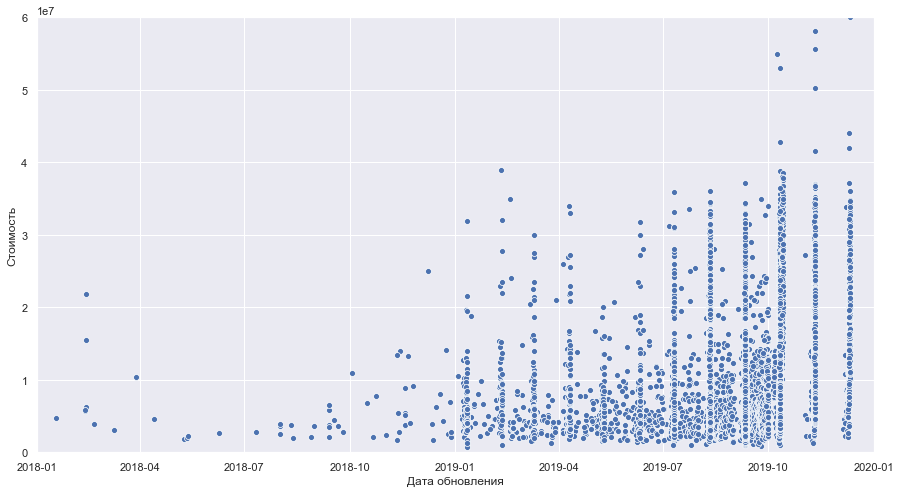

In [85]:
plt.figure(figsize=(15,8))
axes = sns.scatterplot(cian_data_datetime, cian_data['Стоимость'])

axes.set_xlim([pd.to_datetime('20180101', format='%Y%m%d', errors='ignore'), 
               pd.to_datetime('20200101', format='%Y%m%d', errors='ignore')])
axes.set_ylim(0, 0.6 * 10**8)

In [86]:
cian_data['Регион Циан'].value_counts().head(20)

Москва            26680
Люберецкий         1549
Одинцовский        1262
Ленинский          1093
Мытищи             1038
Балашихинский       974
Химки               819
Красногорск         766
Красногорский       566
Пушкинский          341
Истра               249
Наро-Фоминский      187
Солнечногорск       180
Раменский           178
Королев             162
Люберцы             134
Богородский         118
Реутов               99
Дмитровский          88
Электросталь         78
Name: Регион Циан, dtype: int64

### Prepare features

#### "Тип продажи"

In [87]:
cian_data_type_sale = cian_data['Тип продажи'].str.split(',', expand=True)
for feature in cian_data_type_sale.columns:
    cian_data_type_sale[feature] = cian_data_type_sale[feature].str.strip()

In [88]:
(cian_data_type_sale[0].value_counts().index.to_list() + 
 cian_data_type_sale[1].value_counts().index.to_list())

['Долевое участие (214-ФЗ)',
 '',
 'Свободная продажа',
 'Альтернатива',
 'Возможна ипотека']

In [89]:
# replace '' by NaN
cian_data_type_sale[0] = cian_data_type_sale[0].map(lambda x: [x, np.nan][x == ''])
cian_data_type_sale[1] = cian_data_type_sale[1].map(lambda x: [x, np.nan][x == ''])

In [90]:
cian_data_type_sale.isnull().sum()

0    4656
1    1016
dtype: int64

In [91]:
cian_data_type_sale = pd.get_dummies(cian_data_type_sale, prefix='', prefix_sep='')
cian_data_type_sale.head()

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека
0,0,0,1,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,0
4,0,0,0,1


#### "Площадь"

In [92]:
cian_data['Общая площадь'].str.strip('=\"').astype('float')
# Общая площадь, Жилая площадь, Площадь кухни

0         42.20
1         70.03
2         76.47
3         60.00
4         65.20
          ...  
37395     62.50
37396     80.40
37397     84.00
37398    104.90
37399     72.71
Name: Общая площадь, Length: 37307, dtype: float64

In [93]:
cian_data_areas = pd.DataFrame()
area_features = ['Общая площадь', 'Жилая площадь', 'Площадь кухни']
for column in area_features:
    cian_data_areas[column] = (cian_data[column].str.strip('=\"')
                               .replace('', np.nan)
                               .astype('float'))

In [94]:
cian_data_areas.head()

,Общая площадь,Жилая площадь,Площадь кухни
0,42.20,19.9,11.0
1,70.03,41.8,13.7
2,76.47,43.4,11.2
3,60.00,38.0,12.0
4,65.20,NaN,NaN


In [95]:
cian_data_areas.isna().any()

Общая площадь    False
Жилая площадь     True
Площадь кухни     True
dtype: bool

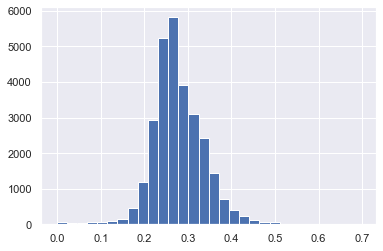

In [96]:
# Find mean value for living area and kitchen area'

hallway_area = ((cian_data_areas['Общая площадь'] - cian_data_areas['Жилая площадь'] - 
          cian_data_areas['Площадь кухни']) / cian_data_areas['Общая площадь'])
hallway_area.hist(bins=30)
hallway_area_median = hallway_area.median()

In [97]:
# ratio_living_kitchen = (cian_data_areas['Жилая площадь'] / 
#                         cian_data_areas['Площадь кухни'])
# ratio_living_kitchen.hist(bins=30)
# ratio_living_kitchen_median = ratio_living_kitchen.median()

In [98]:
# cian_data_areas['Жилая площадь'].map(lambda x: )
# for index, row in cian_data_areas.iterrows():
#     if not row['Жилая площадь']:
#         print(index, row)

In [99]:
# cian_data_areas_living = ((cian_data_areas['Общая площадь'] - hallway_area_median) *
#                           (1 - 1 / (ratio_living_kitchen_median + 1)))
# pd.concat( (cian_data_areas_living, cian_data_areas['Площадь кухни']), axis=1)

In [100]:
kitchen_area_median = cian_data_areas['Площадь кухни'].median()
kitchen_area_median
# living_area_median = cian_data_areas['Общая площадь'] - hallway_area_median - kitchen_area_median

13.8

In [101]:
cian_data_areas.fillna(value={'Площадь кухни': kitchen_area_median}, inplace=True)

In [102]:
cian_data_areas

,Общая площадь,Жилая площадь,Площадь кухни
0,42.20,19.9,11.0
1,70.03,41.8,13.7
2,76.47,43.4,11.2
3,60.00,38.0,12.0
4,65.20,NaN,13.8
...,...,...,...
37395,62.50,34.0,9.6
37396,80.40,40.8,12.3
37397,84.00,45.0,12.5
37398,104.90,60.0,13.8


In [103]:
for index, _ in (cian_data_areas['Жилая площадь']
                 [cian_data_areas['Жилая площадь'].isna()].items()):
    
    replace_value = (cian_data_areas['Общая площадь'][index] -
                     cian_data_areas['Площадь кухни'][index])
    
    cian_data_areas['Жилая площадь'][index] = replace_value

In [104]:
cian_data_areas.isnull().sum()

Общая площадь    0
Жилая площадь    0
Площадь кухни    0
dtype: int64

### "Numeric features"

In [105]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cian_data.select_dtypes(include=numerics).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37307 entries, 0 to 37399
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Этаж                        37307 non-null  int64  
 1   Этажей в доме               37307 non-null  int64  
 2   Лифт пассажирский (кол-во)  35891 non-null  float64
 3   Лифт грузовой (кол-во)      35610 non-null  float64
 4   Количество комнат           34883 non-null  float64
 5   Высота потолков             16483 non-null  float64
 6   Кол-во раздельных санузлов  28943 non-null  float64
 7   Стоимость                   37307 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 2.6 MB


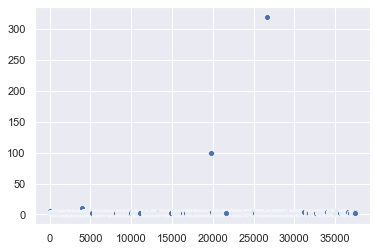

In [106]:
sns.scatterplot(cian_data['Высота потолков'].index, cian_data['Высота потолков'].values)
# height > 6 meters is unusual

In [107]:
cian_data_height_medium = cian_data['Высота потолков'].median()

In [176]:
drop_indexes_height = cian_data[cian_data['Высота потолков'] > 7].index
cian_data.iloc[drop_indexes]
# Drop these points later

,Тип продажи,Объект продажи,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),Лифт грузовой (кол-во),Мусоропровод,...,Высота потолков,Кол-во раздельных санузлов,Вид из окон,Расстояние до метро,Адрес,Стоимость,ФИО продавца,Признак актуальности,Дата обновления,Регион Циан
4005,"Альтернатива, Возможна ипотека",Вторичка,"=""56.0""","=""43.0""","=""6.0""",2,5,NaN,NaN,Нет,...,10.0,1.0,На улицу и двор,NaN,"Московская область,Солнечногорск городской окр...",4650000,NaN,Опубликовано,28.09.2019 19:04:57,Солнечногорск
19933,", Возможна ипотека",Новостройка,"=""78.9""","=""49.1""","=""14.1""",8,17,NaN,NaN,Нет,...,NaN,1.0,NaN,13 мин. пешком,"Москва,ЮВАО,район Некрасовка,Люберецкие Поля м...",8064910,Евгений Шерстников,Опубликовано,11.10.2019 18:55:07,Москва
26763,"Долевое участие (214-ФЗ), Возможна ипотека",Новостройка,"=""62.37""","=""""","=""""",20,20,2.0,1.0,Нет,...,3.0,1.0,Во двор,2 мин. на транспорте,"Москва,САО,район Хорошевский,улица Зорге",11740200,St Michael,Опубликовано,11.10.2019 8:05:05,Москва


In [109]:
cian_data_numerics = cian_data.select_dtypes(include=numerics).fillna(
    value={
        'Лифт пассажирский (кол-во)': 0,
        'Лифт грузовой (кол-во)': 0,
        'Количество комнат': 1,
        'Высота потолков': cian_data_height_medium,
        'Кол-во раздельных санузлов': 0})

cian_data_numerics

,Этаж,Этажей в доме,Лифт пассажирский (кол-во),Лифт грузовой (кол-во),Количество комнат,Высота потолков,Кол-во раздельных санузлов,Стоимость
0,2,3,0.0,0.0,1.0,2.85,1.0,2850000
1,2,17,1.0,1.0,2.0,2.85,1.0,7073030
2,11,17,1.0,1.0,3.0,2.85,1.0,7799940
3,5,20,2.0,2.0,2.0,2.85,2.0,11700000
4,2,5,0.0,1.0,2.0,2.85,0.0,6055000
...,...,...,...,...,...,...,...,...
37395,3,3,0.0,0.0,2.0,2.85,1.0,4312500
37396,3,3,0.0,0.0,3.0,2.85,1.0,5102860
37397,3,3,0.0,0.0,3.0,2.85,1.0,5376000
37398,10,20,1.0,1.0,3.0,3.00,2.0,7000000


In [110]:
# More than 5 floors and no elevator seems unusual
cian_data_numerics[(cian_data_numerics['Этажей в доме'] > 5) &
    (cian_data_numerics['Лифт пассажирский (кол-во)'] == 0)].count()


Этаж                          1550
Этажей в доме                 1550
Лифт пассажирский (кол-во)    1550
Лифт грузовой (кол-во)        1550
Количество комнат             1550
Высота потолков               1550
Кол-во раздельных санузлов    1550
Стоимость                     1550
dtype: int64

In [111]:
# Replace 0 to 1 elevator in houses with >5 floors  
filter_elevators = (cian_data_numerics['Этажей в доме'].gt(5) & 
                    cian_data_numerics['Лифт пассажирский (кол-во)'].eq(0))
cian_data_numerics.loc[filter_elevators, 'Лифт пассажирский (кол-во)'] = 1

In [112]:
# Check
(cian_data_numerics[cian_data_numerics['Этажей в доме'] > 5]
     ['Лифт пассажирский (кол-во)'].value_counts())

1.0     29453
2.0      5922
3.0       505
6.0       170
4.0       108
8.0        49
9.0        11
5.0         8
12.0        5
15.0        1
10.0        1
Name: Лифт пассажирский (кол-во), dtype: int64

### Look at categorical features

In [113]:
full_filled = ['Объект продажи', 'Мусоропровод', 'Телефон', 'Адрес', 
              'Признак актуальности', 'Дата обновления', 'Регион Циан']
already_prepared = area_features + ['Тип продажи'] + full_filled

cian_data[full_filled].isnull().any()

Объект продажи          False
Мусоропровод            False
Телефон                 False
Адрес                   False
Признак актуальности    False
Дата обновления         False
Регион Циан             False
dtype: bool

In [114]:
(cian_data.select_dtypes(exclude=numerics)
     .drop(already_prepared, axis=1)
     .isnull().any())

Парковка               True
Тип дома               True
Название дома (ЖК)     True
Вид из окон            True
Расстояние до метро    True
ФИО продавца           True
dtype: bool

In [115]:
cian_data_categorical = (cian_data.select_dtypes(exclude=numerics)
                             .drop(already_prepared, axis=1))
cian_data_categorical.describe()

,Парковка,Тип дома,Название дома (ЖК),Вид из окон,Расстояние до метро,ФИО продавца
count,33049,37048,37104,17680,35316,32912
unique,3,5,776,3,138,1145
top,подземная,Монолитный,ЖК «Хорошевский»,Во двор,2 мин. на транспорте,ПИК
freq,15653,32359,1158,8423,5632,6198


In [116]:
# Look at the most frequent values
cian_data_categorical.mode().iloc[0]

Парковка                          подземная
Тип дома                         Монолитный
Название дома (ЖК)         ЖК «Хорошевский»
Вид из окон                         Во двор
Расстояние до метро    2 мин. на транспорте
ФИО продавца                            ПИК
Name: 0, dtype: object

In [379]:
# Replace missing values
cian_data_categorical = cian_data_categorical.fillna(value={
    'Парковка': 'Неизвестно',
    'Тип дома': 'Монолитный',
    'Название дома (ЖК)': 'Другое',
    'Вид из окон': 'Во двор',
    'ФИО продавца': 'Другое'
})
cian_data_categorical

,Парковка,Тип дома,Название дома (ЖК),Вид из окон,Расстояние до метро,ФИО продавца
0,Нет,Кирпичный,ЖК «Маяковского»,Во двор,NaN,Другое
1,подземная,Монолитный,ЖК «Белая звезда»,Во двор,12 мин. на транспорте,ИНКОМ-Новостройки
2,подземная,Монолитный,ЖК «Белая звезда»,Во двор,12 мин. на транспорте,ИНКОМ-Новостройки
3,Нет,Монолитный,ЖК «Хорошевский»,На улицу и двор,3 мин. на транспорте,Другое
4,подземная,Монолитный,ЖК «Рублевское предместье»,На улицу и двор,NaN,Другое
...,...,...,...,...,...,...
37395,Нет,Кирпичный,ЖК «Павловский квартал»,На улицу и двор,NaN,Русфинриэлти
37396,Нет,Кирпичный,ЖК «Павловский квартал»,На улицу и двор,23 мин. на транспорте,Русфинриэлти
37397,Нет,Кирпичный,ЖК «Павловский квартал»,На улицу и двор,NaN,Русфинриэлти
37398,Нет,Монолитный,ЖК «Эдельвейс-Комфорт»,На улицу и двор,NaN,Другое


In [380]:
cian_data_sub_distance = cian_data['Расстояние до метро'].str.split('.', expand=True)
cian_data_sub_distance_time = cian_data_sub_distance[0].str.rstrip(' мин').astype(float)
cian_data_sub_distance_time.name = 'Время до метро'
# Save 1/0 filter mask 
cian_data_sub_distance_filter = cian_data_sub_distance_time.isna()
cian_data_sub_distance_filter.name = 'Пропущено время'

cian_data_sub_distance_time.value_counts().sort_index()

0.0         5
1.0       433
2.0      6097
3.0      4824
4.0      2013
         ... 
102.0       5
106.0       2
108.0       4
113.0       3
118.0      23
Name: Время до метро, Length: 88, dtype: int64

In [381]:
cian_data_sub_distance_type = cian_data_sub_distance[1].str.strip()
cian_data_sub_distance_type.name = 'Тип маршрута'
cian_data_sub_distance_type.value_counts(dropna=False)

на транспорте    22759
пешком           12557
NaN               1991
Name: Тип маршрута, dtype: int64

In [382]:
# fill missing time by random value from 99 percentile 
# (99% events included) to maximum value: [40, 118] min
max_random_time = cian_data_sub_distance_time.max()
min_random_time = cian_data_sub_distance_time.quantile(0.99)

cian_data_sub_distance_time[cian_data_sub_distance_filter] = (
    np.random.randint(min_random_time, max_random_time, 
    size=cian_data_sub_distance_filter.shape[0]))

In [383]:
# Check
cian_data_sub_distance_time[cian_data_sub_distance_filter]

0         94.0
4         86.0
7         76.0
9        101.0
10        42.0
         ...  
37393     75.0
37394     64.0
37395     56.0
37397    106.0
37398     55.0
Name: Время до метро, Length: 1991, dtype: float64

In [384]:
# fill missing type by the worst type
cian_data_sub_distance_type.fillna('на транспорте', inplace=True)

### Join results

In [3]:
cian_data_filled = pd.concat((
        cian_data_type_sale,
        cian_data_areas,
        cian_data_numerics,
        cian_data_categorical.drop('Расстояние до метро', axis=1),
        cian_data_sub_distance_time,
        cian_data_sub_distance_type,
        cian_data_sub_distance_filter.map(int),
        cian_data[full_filled]),
    axis=1
)

NameError: name 'cian_data_type_sale' is not defined

In [386]:
cian_data_filled.T

,0,1,2,3,4,5,6,7,8,9,...,37390,37391,37392,37393,37394,37395,37396,37397,37398,37399
Альтернатива,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Долевое участие (214-ФЗ),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Свободная продажа,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Возможна ипотека,1,1,1,0,1,1,1,0,1,1,...,1,0,1,1,1,1,1,1,0,1
Общая площадь,42.2,70.03,76.47,60,65.2,38.18,44,29,100,35,...,39.2,136.6,44.41,59.7,58.6,62.5,80.4,84,104.9,72.71
Жилая площадь,19.9,41.8,43.4,38,51.4,17.3,17.5,19,50,18,...,17.8,72.5,18.4,34.3,34.3,34,40.8,45,60,33
Площадь кухни,11,13.7,11.2,12,13.8,8.1,12.2,13.8,27,11,...,9.5,19,10.9,10.3,10.3,9.6,12.3,12.5,13.8,16.5
Этаж,2,2,11,5,2,1,2,14,2,1,...,4,3,1,3,1,3,3,3,10,1
Этажей в доме,3,17,17,20,5,3,5,17,12,3,...,22,21,3,3,3,3,3,3,20,3
Лифт пассажирский (кол-во),0,1,1,2,0,0,1,1,2,0,...,1,2,0,0,0,0,0,0,1,0


In [387]:
# Drop flats with unusual height > 6 meters
cian_data_filled = cian_data_filled[~(cian_data_filled['Высота потолков'] > 6)]

In [408]:
# Save prepared data
cian_data_filled.to_csv('cian_data_filled.csv')

#### Read

In [142]:
cian_data_filled = pd.read_csv('cian_data_filled.csv', index_col=0)

In [143]:
cian_data_filled.head()

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Время до метро,Тип маршрута,Пропущено время,Объект продажи,Мусоропровод,Телефон,Адрес,Признак актуальности,Дата обновления,Регион Циан
0,0,0,1,1,42.20,19.9,11.0,2,3,0.0,...,94.0,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Богородский городской округ...",Опубликовано,08.10.2019 13:56:39,Богородский
1,0,0,0,1,70.03,41.8,13.7,2,17,1.0,...,12.0,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 9:25:04,Москва
2,0,0,0,1,76.47,43.4,11.2,11,17,1.0,...,12.0,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 6:45:06,Москва
3,0,0,0,0,60.00,38.0,12.0,5,20,2.0,...,3.0,на транспорте,0,Новостройка,Нет,Нет,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Опубликовано,11.10.2019 16:30:13,Москва
4,0,0,0,1,65.20,51.4,13.8,2,5,0.0,...,86.0,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Красногорск городской округ...",Опубликовано,09.10.2019 19:10:04,Красногорск


### Look at dependencies

In [144]:
num_columns = ['Общая площадь', 'Жилая площадь', 'Площадь кухни',
    'Этаж', 'Этажей в доме', 'Лифт пассажирский (кол-во)', 'Лифт грузовой (кол-во)',
    'Количество комнат', 'Высота потолков', 'Кол-во раздельных санузлов','Время до метро',
    'Стоимость']

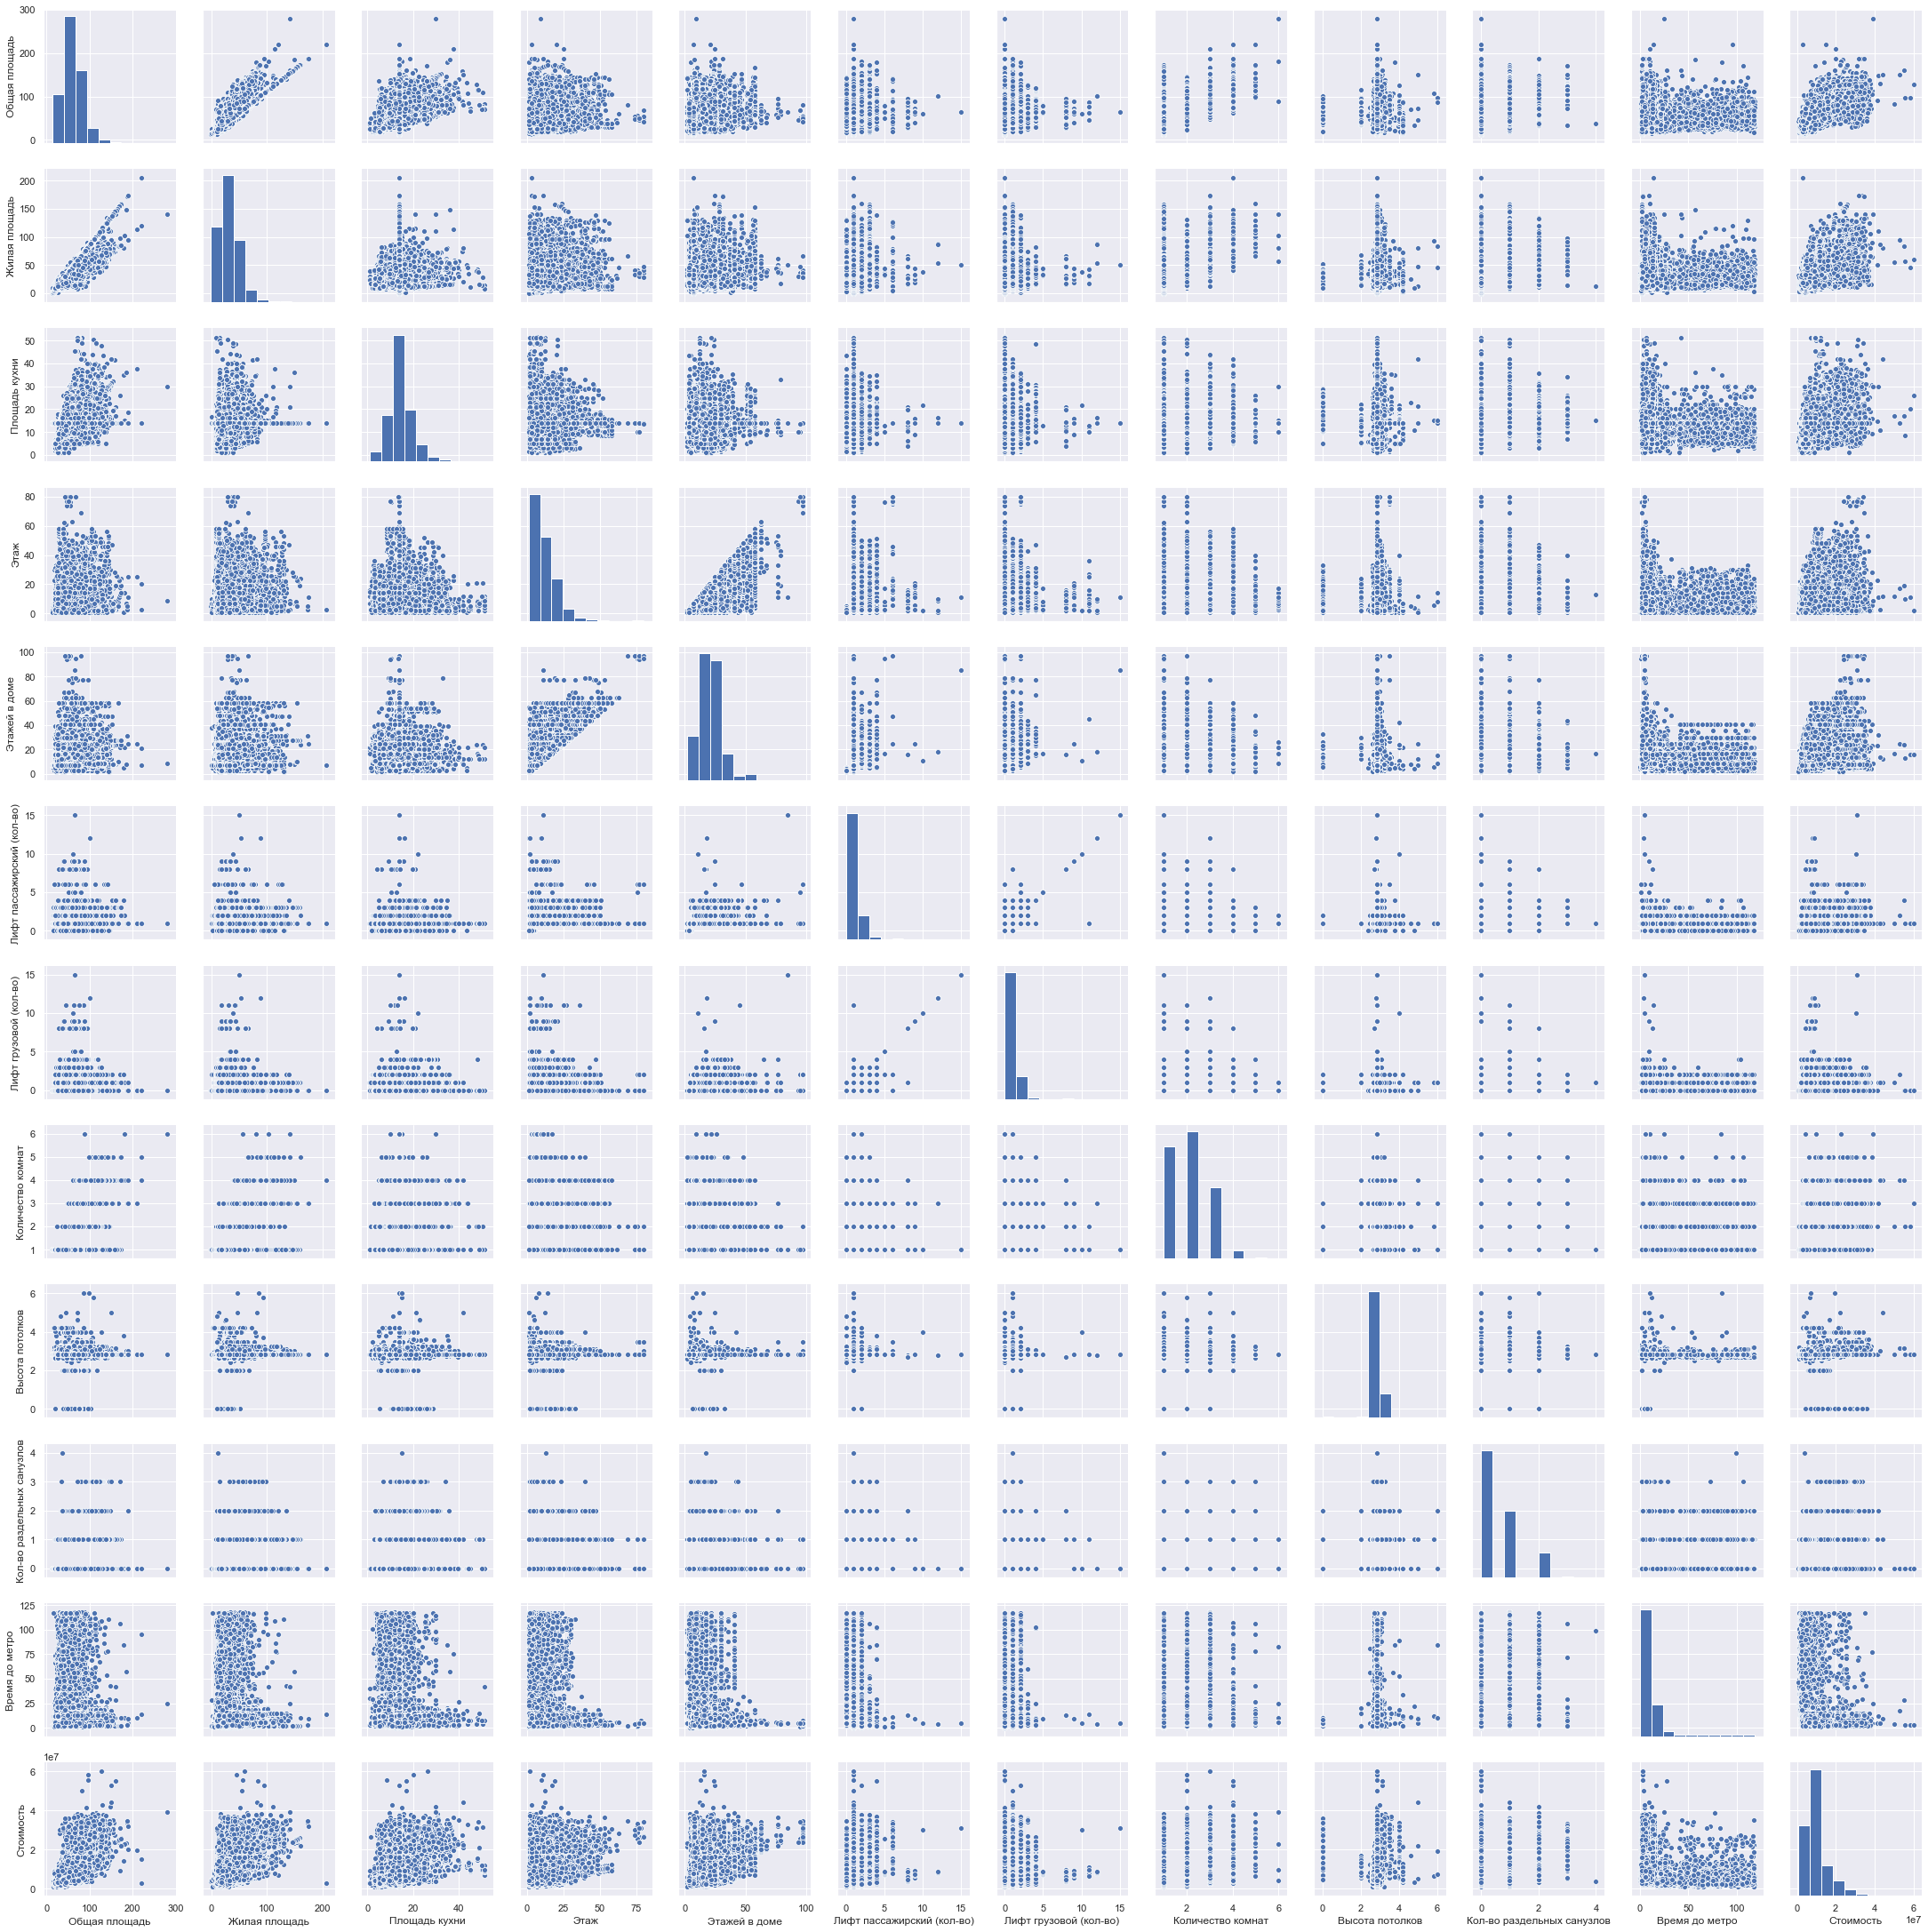

In [463]:
sns.pairplot(cian_data_filled[num_columns])

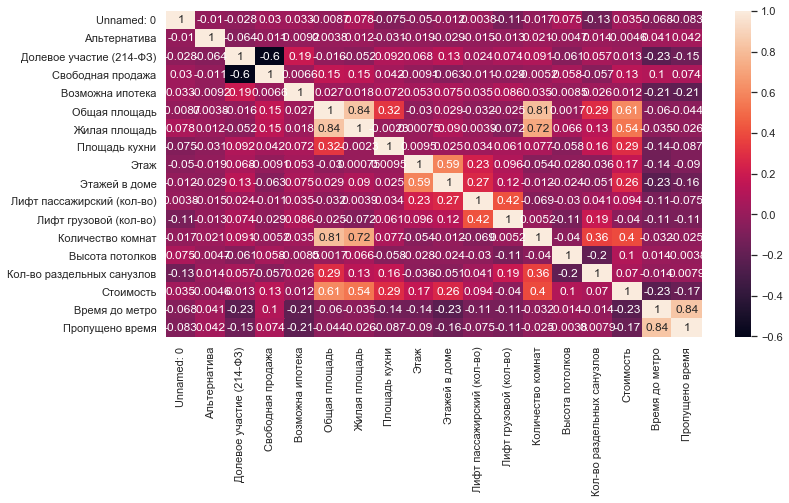

In [464]:
feature_correlation = cian_data_filled.corr(method='pearson')
plt.figure(figsize=(12,6))
sns.heatmap(feature_correlation, annot=True)

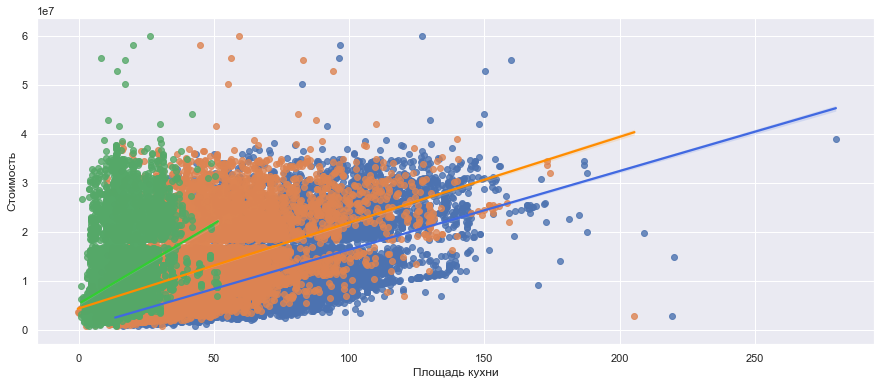

In [465]:
plt.figure(figsize=(15,6))
sns.regplot(cian_data_filled["Общая площадь"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'royalblue'})
sns.regplot(cian_data_filled["Жилая площадь"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})
sns.regplot(cian_data_filled["Площадь кухни"],
            cian_data_filled["Стоимость"], 
            line_kws={'color': 'limegreen'})

In [145]:
# Several points looks like outlier. Drop them. 

cian_data_filled = cian_data_filled[~(cian_data_filled['Стоимость'] > 0.8 * 10**8)]
cian_data_filled = cian_data_filled[~(cian_data_filled['Общая площадь'] > 300)]


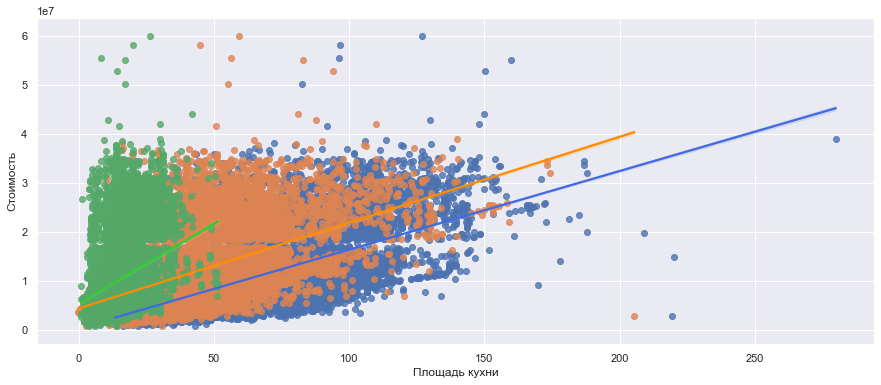

In [467]:
plt.figure(figsize=(15,6))
sns.regplot(cian_data_filled["Общая площадь"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'royalblue'})
sns.regplot(cian_data_filled["Жилая площадь"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})
sns.regplot(cian_data_filled["Площадь кухни"],
            cian_data_filled["Стоимость"], 
            line_kws={'color': 'limegreen'})

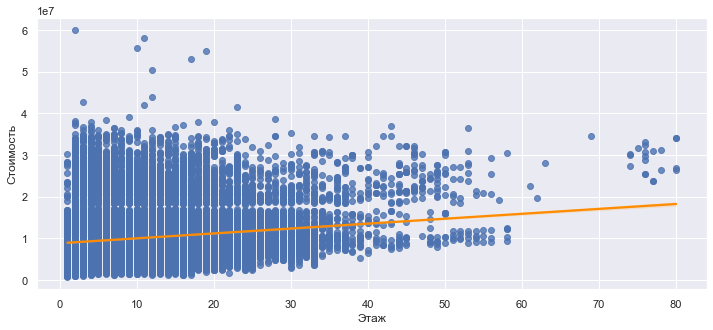

In [468]:
plt.figure(figsize=(12,5))
sns.regplot(cian_data_filled["Этаж"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})

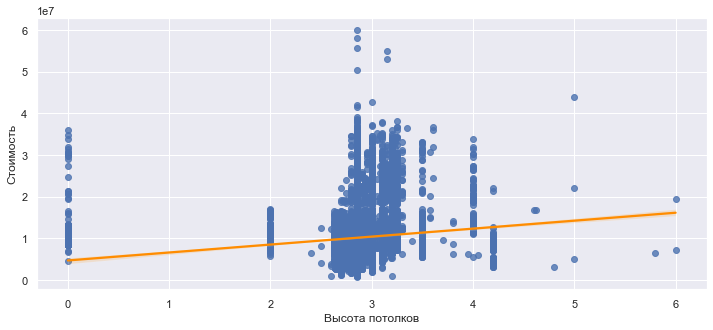

In [469]:
plt.figure(figsize=(12,5))
sns.regplot(cian_data_filled["Высота потолков"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})

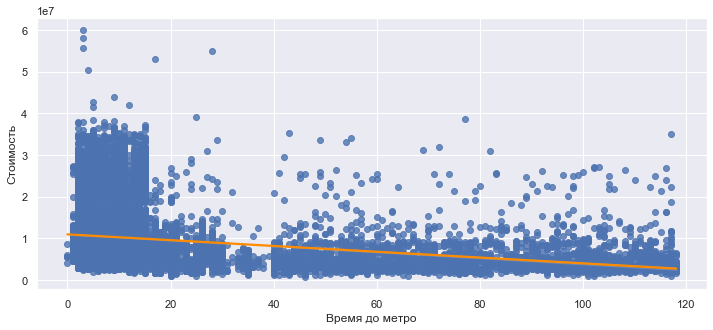

In [141]:
plt.figure(figsize=(12,5))
sns.regplot(cian_data_filled["Время до метро"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})

In [9]:
cian_data_filled_copy.head()

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Время до метро,Тип маршрута,Пропущено время,Объект продажи,Мусоропровод,Телефон,Адрес,Признак актуальности,Дата обновления,Регион Циан
0,0,0,1,1,42.20,19.9,11.0,2,3,0.0,...,376.0,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Богородский городской округ...",Опубликовано,08.10.2019 13:56:39,Богородский
1,0,0,0,1,70.03,41.8,13.7,2,17,1.0,...,48.0,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 9:25:04,Москва
2,0,0,0,1,76.47,43.4,11.2,11,17,1.0,...,48.0,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 6:45:06,Москва
3,0,0,0,0,60.00,38.0,12.0,5,20,2.0,...,12.0,на транспорте,0,Новостройка,Нет,Нет,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Опубликовано,11.10.2019 16:30:13,Москва
4,0,0,0,1,65.20,51.4,13.8,2,5,0.0,...,344.0,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Красногорск городской округ...",Опубликовано,09.10.2019 19:10:04,Красногорск


In [146]:
# Multiply type 'пешком' by ~4.
# This way we can join the columns to one.

cian_data_filled_copy = cian_data_filled[[
    'Время до метро', 'Тип маршрута', 'Стоимость']].copy()
choosen_indexes = cian_data_filled_copy[cian_data_filled_copy['Тип маршрута'] == 'на транспорте'].index

cian_data_filled_copy.loc[choosen_indexes, 'Время до метро'] = (
        cian_data_filled_copy.loc[choosen_indexes, 'Время до метро'] * 4)

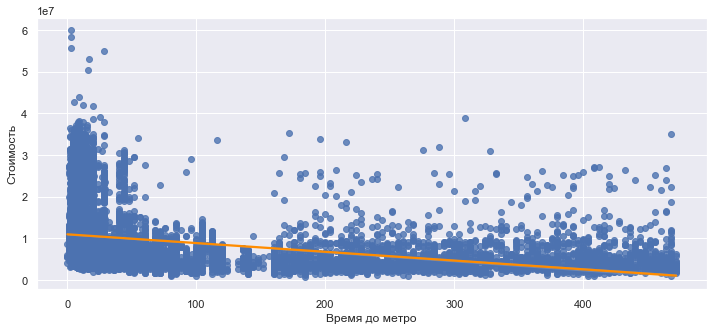

In [147]:
plt.figure(figsize=(12,5))
sns.regplot(cian_data_filled_copy["Время до метро"],
            cian_data_filled_copy["Стоимость"],
            line_kws={'color': 'darkorange'})

Text(0, 0.5, 'Стоимость')

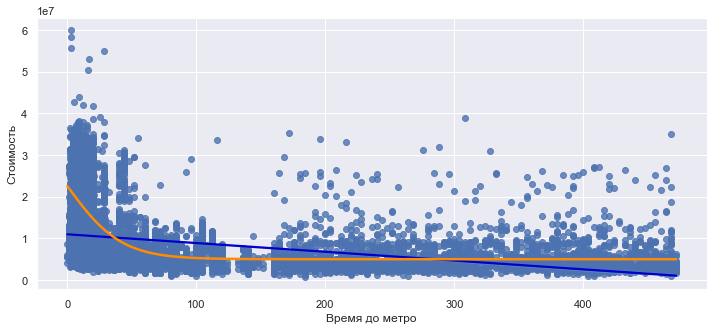

In [148]:
# Fit the 'time to subway' distribution 

import scipy

def fit_time_to_sub(x, a, b, c):
    return (a / (1 + np.exp(b*x))) + c


p0 = (-3.5 * 10**7, -0.048, 4 * 10**7)
 
    
# pars, _ = scipy.optimize.curve_fit(
#     fit_time_to_sub, cian_data_filled_copy["Время до метро"],  
#     cian_data_filled_copy["Стоимость"], p0=p0)
# print(pars)


plt.figure(figsize=(12,5))

sns.regplot(cian_data_filled_copy["Время до метро"],
            cian_data_filled_copy["Стоимость"],
            line_kws={'color': 'mediumblue'})
ax = sns.lineplot(
    cian_data_filled_copy["Время до метро"],
    fit_time_to_sub(cian_data_filled_copy["Время до метро"], *p0),
    color='darkorange',
    linewidth=2.5)
ax.set_ylabel('Стоимость')

In [149]:
# Add the fit as column

fit_time_price_series = pd.Series(
    fit_time_to_sub(cian_data_filled_copy["Время до метро"], *p0))
fit_time_price_series.name = 'Цена от времени'
fit_time_price_series

cian_data_filled = cian_data_filled.join(fit_time_price_series)
cian_data_filled

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Тип маршрута,Пропущено время,Объект продажи,Мусоропровод,Телефон,Адрес,Признак актуальности,Дата обновления,Регион Циан,Цена от времени
0,0,0,1,1,42.20,19.9,11.0,2,3,0.0,...,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Богородский городской округ...",Опубликовано,08.10.2019 13:56:39,Богородский,5.000001e+06
1,0,0,0,1,70.03,41.8,13.7,2,17,1.0,...,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 9:25:04,Москва,8.177728e+06
2,0,0,0,1,76.47,43.4,11.2,11,17,1.0,...,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 6:45:06,Москва,8.177728e+06
3,0,0,0,0,60.00,38.0,12.0,5,20,2.0,...,на транспорте,0,Новостройка,Нет,Нет,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Опубликовано,11.10.2019 16:30:13,Москва,1.759487e+07
4,0,0,0,1,65.20,51.4,13.8,2,5,0.0,...,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Красногорск городской округ...",Опубликовано,09.10.2019 19:10:04,Красногорск,5.000002e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37395,0,0,0,1,62.50,34.0,9.6,3,3,0.0,...,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Истра городской округ,д. Ло...",Опубликовано,08.10.2019 17:17:15,Истра,5.000749e+06
37396,0,0,0,1,80.40,40.8,12.3,3,3,0.0,...,на транспорте,0,Новостройка,Нет,Нет,"Московская область,Истра городской округ,д. Ло...",Опубликовано,08.10.2019 17:17:20,Истра,5.417838e+06
37397,0,0,0,1,84.00,45.0,12.5,3,3,0.0,...,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Истра городской округ,д. Ис...",Опубликовано,08.10.2019 17:17:25,Истра,5.000000e+06
37398,0,0,1,0,104.90,60.0,13.8,10,20,1.0,...,на транспорте,1,Новостройка,Да,Да,"Московская область,Балашиха,улица Чистопольска...",Опубликовано,09.10.2019 14:25:06,Балашихинский,5.000908e+06


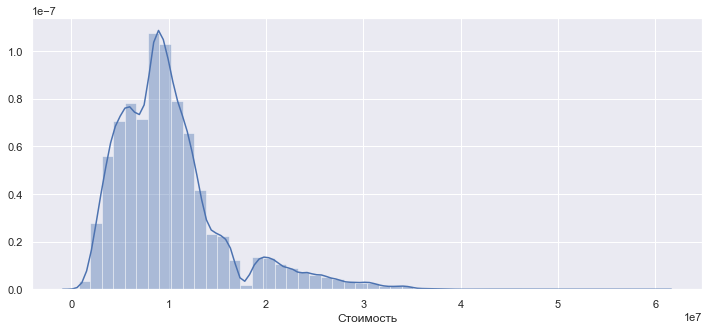

In [471]:
plt.figure(figsize=(12,5))
sns.distplot(cian_data_filled["Стоимость"])

In [472]:
cian_data_filled.drop(num_columns, axis=1).head()

,Unnamed: 0,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Парковка,Тип дома,Название дома (ЖК),Вид из окон,ФИО продавца,Тип маршрута,Пропущено время,Объект продажи,Мусоропровод,Телефон,Адрес,Признак актуальности,Дата обновления,Регион Циан
0,0,0,0,1,1,Нет,Кирпичный,ЖК «Маяковского»,Во двор,Другое,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Богородский городской округ...",Опубликовано,08.10.2019 13:56:39,Богородский
1,1,0,0,0,1,подземная,Монолитный,ЖК «Белая звезда»,Во двор,ИНКОМ-Новостройки,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 9:25:04,Москва
2,2,0,0,0,1,подземная,Монолитный,ЖК «Белая звезда»,Во двор,ИНКОМ-Новостройки,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 6:45:06,Москва
3,3,0,0,0,0,Нет,Монолитный,ЖК «Хорошевский»,На улицу и двор,Другое,на транспорте,0,Новостройка,Нет,Нет,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Опубликовано,11.10.2019 16:30:13,Москва
4,4,0,0,0,1,подземная,Монолитный,ЖК «Рублевское предместье»,На улицу и двор,Другое,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Красногорск городской округ...",Опубликовано,09.10.2019 19:10:04,Красногорск


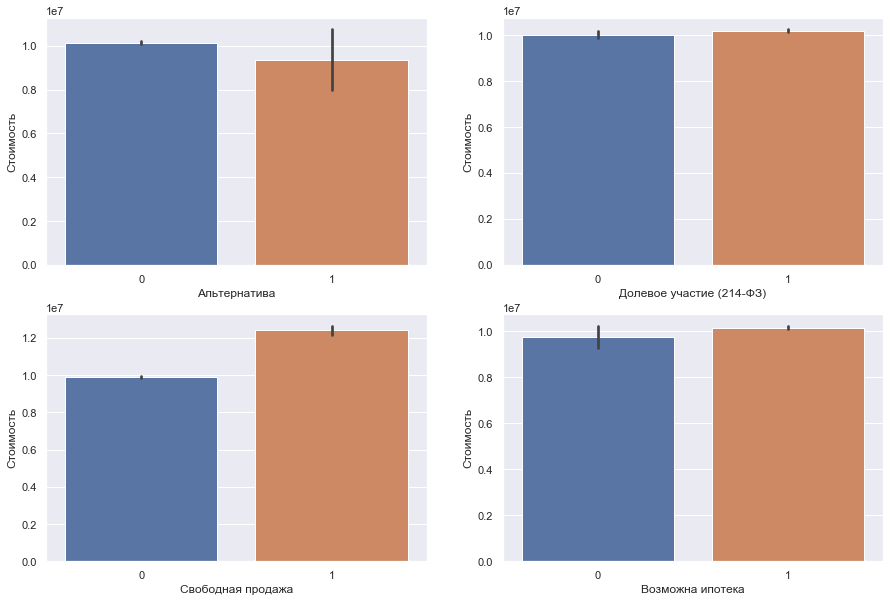

In [473]:
fig, axes = plt.subplots(2,2, figsize = (15, 10))
sns.barplot(data=cian_data_filled, x='Альтернатива', y="Стоимость", ax=axes[0][0])
sns.barplot(data=cian_data_filled, x='Долевое участие (214-ФЗ)', y="Стоимость", ax=axes[0][1])
sns.barplot(data=cian_data_filled, x='Свободная продажа', y="Стоимость", ax=axes[1][0])
sns.barplot(data=cian_data_filled, x='Возможна ипотека', y="Стоимость", ax=axes[1][1])

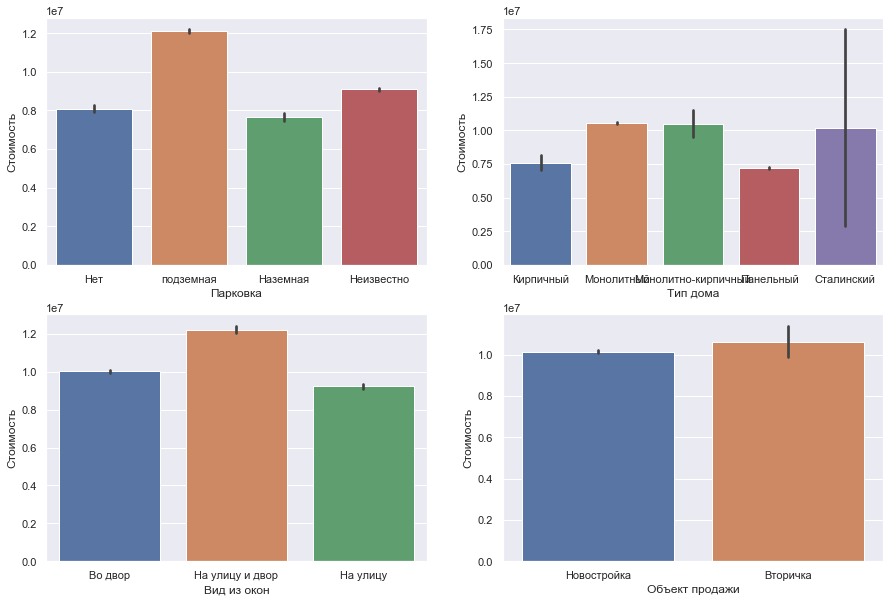

In [474]:
fig, axes = plt.subplots(2,2, figsize = (15, 10))
sns.barplot(data=cian_data_filled, x='Парковка', y="Стоимость", ax=axes[0][0])
sns.barplot(data=cian_data_filled, x='Тип дома', y="Стоимость", ax=axes[0][1])
sns.barplot(data=cian_data_filled, x='Вид из окон', y="Стоимость", ax=axes[1][0])
sns.barplot(data=cian_data_filled, x='Объект продажи', y="Стоимость", ax=axes[1][1])

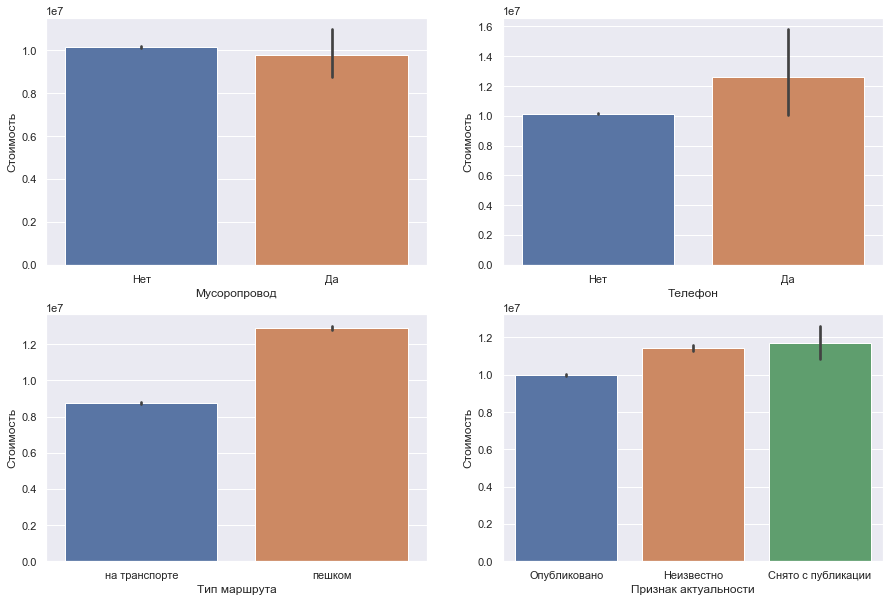

In [6]:
fig, axes = plt.subplots(2,2, figsize = (15, 10))
sns.barplot(data=cian_data_filled, x='Мусоропровод', y="Стоимость", ax=axes[0][0])
sns.barplot(data=cian_data_filled, x='Телефон', y="Стоимость", ax=axes[0][1])
sns.barplot(data=cian_data_filled, x='Тип маршрута', y="Стоимость", ax=axes[1][0])
sns.barplot(data=cian_data_filled, x='Признак актуальности', y="Стоимость", ax=axes[1][1])

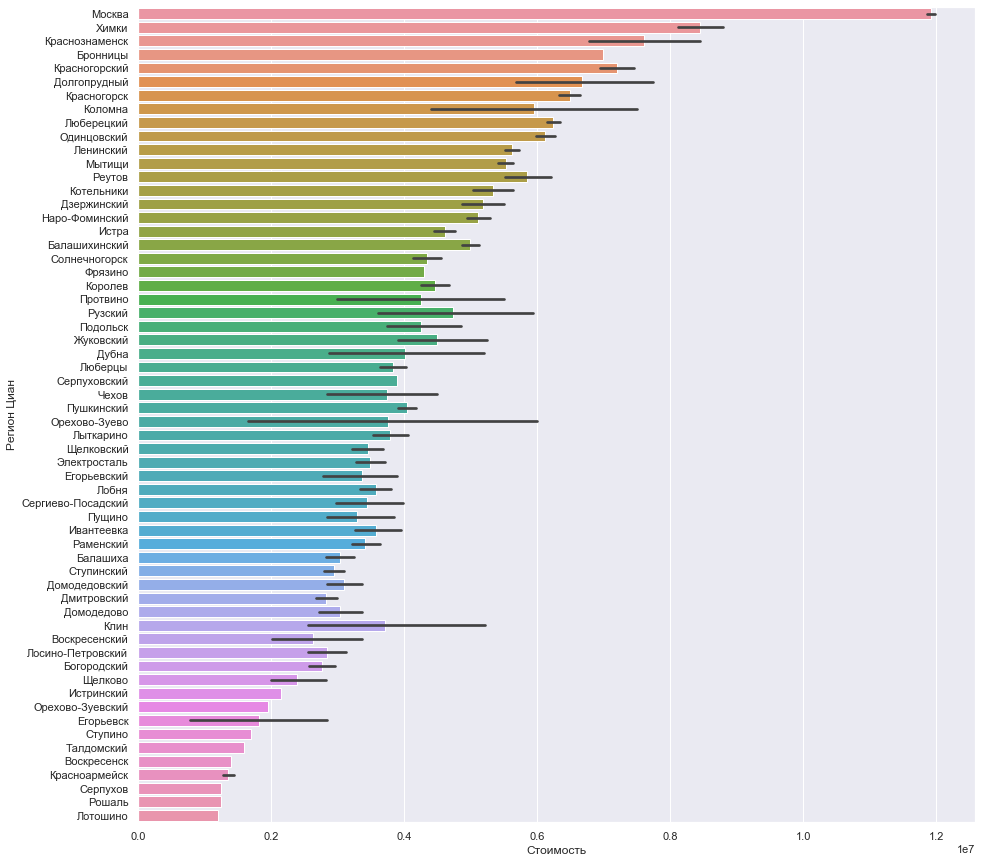

In [476]:
plt.figure(figsize=(15,15))

order_regions = (cian_data_filled.groupby(['Регион Циан'])['Стоимость']
                 .aggregate(np.median)
                 .reset_index()
                 .sort_values('Стоимость', ascending=False))
sns.barplot(data=cian_data_filled, x='Стоимость', y='Регион Циан', 
            order=order_regions['Регион Циан'])

In [150]:
cian_data_filled.select_dtypes(include=object).head().T

,0,1,2,3,4
Парковка,Нет,подземная,подземная,Нет,подземная
Тип дома,Кирпичный,Монолитный,Монолитный,Монолитный,Монолитный
Название дома (ЖК),ЖК «Маяковского»,ЖК «Белая звезда»,ЖК «Белая звезда»,ЖК «Хорошевский»,ЖК «Рублевское предместье»
Вид из окон,Во двор,Во двор,Во двор,На улицу и двор,На улицу и двор
ФИО продавца,Другое,ИНКОМ-Новостройки,ИНКОМ-Новостройки,Другое,Другое
Тип маршрута,на транспорте,на транспорте,на транспорте,на транспорте,на транспорте
Объект продажи,Новостройка,Новостройка,Новостройка,Новостройка,Новостройка
Мусоропровод,Нет,Да,Да,Нет,Нет
Телефон,Нет,Нет,Нет,Нет,Нет
Адрес,"Московская область,Богородский городской округ...","Москва,НАО (Новомосковский),Щербинка,улица 40 ...","Москва,НАО (Новомосковский),Щербинка,улица 40 ...","Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...","Московская область,Красногорск городской округ..."


#### Save and read

In [151]:
cian_data_filled.to_csv('cian_data_filled_prepared.csv')
cian_data_filled = pd.read_csv('cian_data_filled_prepared.csv', index_col=0)

### OneHot encoding

In [152]:
# We are sure we will not see new types of these features

onehot_features = ['Парковка', 'Тип дома', 'Вид из окон', 
                   'Тип маршрута', 'Объект продажи', 'Мусоропровод',
                   'Телефон', 'Признак актуальности']

In [153]:
# Join transformed and drop original features

cian_data_filled = pd.concat((
    cian_data_filled.drop(onehot_features, axis=1), 
    pd.get_dummies(cian_data_filled[onehot_features])),
    axis=1
)

In [156]:
cian_data_filled.columns

Index(['Альтернатива', 'Долевое участие (214-ФЗ)', 'Свободная продажа',
       'Возможна ипотека', 'Общая площадь', 'Жилая площадь', 'Площадь кухни',
       'Этаж', 'Этажей в доме', 'Лифт пассажирский (кол-во)',
       'Лифт грузовой (кол-во)', 'Количество комнат', 'Высота потолков',
       'Кол-во раздельных санузлов', 'Стоимость', 'Название дома (ЖК)',
       'ФИО продавца', 'Время до метро', 'Пропущено время', 'Адрес',
       'Дата обновления', 'Регион Циан', 'Цена от времени',
       'Парковка_Наземная', 'Парковка_Неизвестно', 'Парковка_Нет',
       'Парковка_подземная', 'Тип дома_Кирпичный',
       'Тип дома_Монолитно-кирпичный', 'Тип дома_Монолитный',
       'Тип дома_Панельный', 'Тип дома_Сталинский', 'Вид из окон_Во двор',
       'Вид из окон_На улицу', 'Вид из окон_На улицу и двор',
       'Тип маршрута_на транспорте', 'Тип маршрута_пешком',
       'Объект продажи_Вторичка', 'Объект продажи_Новостройка',
       'Мусоропровод_Да', 'Мусоропровод_Нет', 'Телефон_Да', 'Телефон_Нет'

### Another categorical encoding

#### Look at another categorical features

In [111]:
cian_data_filled.select_dtypes(include=object).head()

,Название дома (ЖК),ФИО продавца,Адрес,Дата обновления,Регион Циан
0,ЖК «Маяковского»,Другое,"Московская область,Богородский городской округ...",08.10.2019 13:56:39,Богородский
1,ЖК «Белая звезда»,ИНКОМ-Новостройки,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",11.10.2019 9:25:04,Москва
2,ЖК «Белая звезда»,ИНКОМ-Новостройки,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",11.10.2019 6:45:06,Москва
3,ЖК «Хорошевский»,Другое,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",11.10.2019 16:30:13,Москва
4,ЖК «Рублевское предместье»,Другое,"Московская область,Красногорск городской округ...",09.10.2019 19:10:04,Красногорск


In [112]:
cian_data_filled.select_dtypes(include=object).describe()

,Название дома (ЖК),ФИО продавца,Адрес,Дата обновления,Регион Циан
count,37299,37299,37299,37299,37299
unique,774,1145,2335,11463,60
top,ЖК «Хорошевский»,ПИК,"Москва,НАО (Новомосковский),Родниковая улица",11.10.2019 6:00:05,Москва
freq,1158,6198,703,166,26674


In [113]:
cian_data_filled.shape

(37299, 46)

In [157]:
# Convert to datetime type

cian_data_filled['Дата обновления'] = pd.to_datetime(cian_data_filled['Дата обновления'])

In [158]:
cian_data_filled['Дата обновления']

0       2019-08-10 13:56:39
1       2019-11-10 09:25:04
2       2019-11-10 06:45:06
3       2019-11-10 16:30:13
4       2019-09-10 19:10:04
                ...        
37395   2019-08-10 17:17:15
37396   2019-08-10 17:17:20
37397   2019-08-10 17:17:25
37398   2019-09-10 14:25:06
37399   2019-08-10 17:12:39
Name: Дата обновления, Length: 37299, dtype: datetime64[ns]

(735964.0, 737425.0)

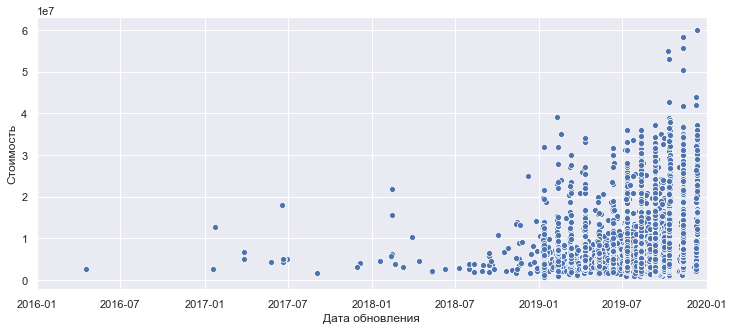

In [116]:
plt.figure(figsize=(12,5))

axes = sns.scatterplot(cian_data_filled['Дата обновления'], cian_data_filled['Стоимость'])

axes.set_xlim([pd.to_datetime('20160101', format='%Y%m%d', errors='ignore'), 
               pd.to_datetime('20200101', format='%Y%m%d', errors='ignore')])

In [47]:
# cian_data_filled = cian_data_filled.sort_values(by='Дата обновления')
# cian_data_filled['Дата обновления']

In [159]:
# Add year and month as features

cian_data_filled_year = cian_data_filled['Дата обновления'].dt.year
cian_data_filled_month = cian_data_filled['Дата обновления'].dt.month

cian_data_filled_year.name = 'Год'
cian_data_filled_month.name = 'Месяц'

cian_data_filled = pd.concat((cian_data_filled, 
    cian_data_filled_year, cian_data_filled_month), axis=1)

In [160]:
cian_data_filled

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Объект продажи_Новостройка,Мусоропровод_Да,Мусоропровод_Нет,Телефон_Да,Телефон_Нет,Признак актуальности_Cнято с публикации,Признак актуальности_Неизвестно,Признак актуальности_Опубликовано,Год,Месяц
0,0,0,1,1,42.20,19.9,11.0,2,3,0.0,...,1,0,1,0,1,0,0,1,2019,8
1,0,0,0,1,70.03,41.8,13.7,2,17,1.0,...,1,1,0,0,1,0,0,1,2019,11
2,0,0,0,1,76.47,43.4,11.2,11,17,1.0,...,1,1,0,0,1,0,0,1,2019,11
3,0,0,0,0,60.00,38.0,12.0,5,20,2.0,...,1,0,1,0,1,0,0,1,2019,11
4,0,0,0,1,65.20,51.4,13.8,2,5,0.0,...,1,0,1,0,1,0,0,1,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37395,0,0,0,1,62.50,34.0,9.6,3,3,0.0,...,1,0,1,0,1,0,0,1,2019,8
37396,0,0,0,1,80.40,40.8,12.3,3,3,0.0,...,1,0,1,0,1,0,0,1,2019,8
37397,0,0,0,1,84.00,45.0,12.5,3,3,0.0,...,1,0,1,0,1,0,0,1,2019,8
37398,0,0,1,0,104.90,60.0,13.8,10,20,1.0,...,1,1,0,1,0,0,0,1,2019,9


#### Save and read

In [574]:
cian_data_filled.to_csv('cian_data_encoded_onehot.csv')
cian_data_filled = pd.read_csv('cian_data_encoded_onehot.csv', index_col=0)

#### It is necessary to split at first. Split by date.

In [575]:
def get_data_splits(dataframe, valid_fraction=0.1, order='Дата обновления'):
    """Splits a dataframe into train, validation, and test sets.

    First, orders by the column 'click_time'. Set the size of the 
    validation and test sets with the valid_fraction keyword argument.
    """

    dataframe = dataframe.sort_values(order)
    valid_rows = int(len(dataframe) * valid_fraction)
    train = dataframe[:-valid_rows * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_rows * 2:-valid_rows]
    test = dataframe[-valid_rows:]
    
    return train, valid, test

In [576]:
x_train, x_valid, x_test = get_data_splits(cian_data_filled)

y_train = x_train['Стоимость']
y_valid = x_valid['Стоимость']
y_test = x_test['Стоимость']

x_train = x_train.drop(['Стоимость'], axis=1)
x_valid = x_valid.drop(['Стоимость'], axis=1)
x_test = x_test.drop(['Стоимость'], axis=1)

In [577]:
# Drop also the date time

x_train = x_train.drop('Дата обновления', axis=1)
x_valid = x_valid.drop('Дата обновления', axis=1)
x_test = x_test.drop('Дата обновления', axis=1)

In [578]:
def feature_encoding(features, encoder, x_train, x_valid, x_test, 
                     encoder_args=[], encoder_kwargs=dict(), y_train=None):
    
    encoder = encoder(*encoder_args, **encoder_kwargs)
    if y_train is not None:
        encoder.fit(x_train[features], y_train)
    else:
        encoder.fit(x_train[features])
        
    cols_train = pd.DataFrame(encoder.transform(x_train[features]))
    cols_train.index = x_train[features].index
    cols_train.columns = x_train[features].columns
    
    cols_valid = pd.DataFrame(encoder.transform(x_valid[features]))
    cols_valid.index = x_valid[features].index
    cols_valid.columns = x_valid[features].columns
    
    cols_test = pd.DataFrame(encoder.transform(x_test[features]))
    cols_test.index = x_test[features].index
    cols_test.columns = x_test[features].columns
    
    return cols_train, cols_valid, cols_test
    
    
def join_features(x_train, x_valid, x_test,
                  cols_train, cols_valid, cols_test):
    
    x_train_ = x_train.drop(target_cols_train.columns, axis=1).join(target_cols_train)
    x_valid_ = x_valid.drop(target_cols_valid.columns, axis=1).join(target_cols_valid)
    x_test_ = x_test.drop(target_cols_test.columns, axis=1).join(target_cols_test)
    
    return x_train_, x_valid_, x_test_

#### Target Encoding

In [579]:
target_features = ['Название дома (ЖК)', 'ФИО продавца', 'Адрес', 'Регион Циан']

target_cols_train, target_cols_valid, target_cols_test = (
    feature_encoding(
        target_features, TargetEncoder, x_train, x_valid, 
        x_test, y_train=y_train
    )
)

x_train, x_valid, x_test = (
    join_features(
        x_train, x_valid, x_test, 
        target_cols_train, target_cols_valid, target_cols_test
    )
)

In [580]:
x_train[target_features]

,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
37387,3.043887e+06,8.767405e+06,4.579366e+06,3.043887e+06
37389,2.105186e+06,2.334415e+06,2.105186e+06,4.215702e+06
20,9.553457e+06,8.767405e+06,9.553457e+06,7.027971e+06
36,5.437729e+06,8.767405e+06,5.437729e+06,4.582865e+06
56,5.437729e+06,4.481116e+06,5.437729e+06,4.582865e+06
...,...,...,...,...
14035,1.721913e+07,1.560333e+07,1.279929e+07,1.138294e+07
843,6.604918e+06,8.767405e+06,6.604918e+06,7.027971e+06
10758,7.959246e+06,8.360222e+06,7.538459e+06,1.138294e+07
24684,1.291645e+07,1.066925e+07,1.222965e+07,1.138294e+07


#### Count Encoding

In [581]:
# count_features = ['Название дома (ЖК)', 'ФИО продавца', 'Адрес', 'Регион Циан']

# count_cols_train, count_cols_valid, count_cols_test = (
#     feature_encoding(
#         count_features, CountEncoder, x_train, x_valid, 
#         x_test, y_train=y_train
#     )
# )

# x_train, x_valid, x_test = (
#     join_features(
#         x_train, x_valid, x_test, 
#         count_cols_train, count_cols_valid, count_cols_test
#     )
# )

#### Scale encoding

In [582]:
print(x_train.nunique()[x_train.nunique() > 2].drop(target_features))
x_train.nunique()[x_train.nunique() > 2].drop(target_features).index

Общая площадь                 4048
Жилая площадь                 1894
Площадь кухни                  358
Этаж                            67
Этажей в доме                   63
Лифт пассажирский (кол-во)      11
Лифт грузовой (кол-во)          11
Количество комнат                6
Высота потолков                 57
Кол-во раздельных санузлов       5
Время до метро                 118
Цена от времени                167
Год                              4
Месяц                           12
dtype: int64


Index(['Общая площадь', 'Жилая площадь', 'Площадь кухни', 'Этаж',
       'Этажей в доме', 'Лифт пассажирский (кол-во)', 'Лифт грузовой (кол-во)',
       'Количество комнат', 'Высота потолков', 'Кол-во раздельных санузлов',
       'Время до метро', 'Цена от времени', 'Год', 'Месяц'],
      dtype='object')

In [583]:
scaled_features = ['Общая площадь', 'Жилая площадь', 'Площадь кухни', 'Время до метро',
       'Цена от времени', 'Год', 'Месяц', 'Этаж', 'Этажей в доме',
       'Лифт пассажирский (кол-во)', 'Лифт грузовой (кол-во)',
       'Количество комнат', 'Высота потолков', 'Кол-во раздельных санузлов']

scaled_cols_train, scaled_cols_valid, scaled_cols_test = (
    feature_encoding(
        scaled_features, StandardScaler, x_train, x_valid, x_test
    )
)

x_train, x_valid, x_test = (
    join_features(
        x_train, x_valid, x_test, 
        scaled_cols_train, scaled_cols_valid, scaled_cols_test
    )
)

#### MinMax encoding

In [586]:
# print(x_train.nunique()[x_train.nunique() > 2].drop(target_features))
# minmax_cols = x_train.nunique()[x_train.nunique() > 2].drop(target_features).index
# minmax_cols

In [584]:
# minmax_features = ['Этаж', 'Этажей в доме', 'Лифт пассажирский (кол-во)', 
# 'Лифт грузовой (кол-во)', 'Количество комнат', 
# 'Высота потолков', 'Кол-во раздельных санузлов']

# minmax_cols_train, minmax_cols_valid, minmax_cols_test = (
#     feature_encoding(
#         minmax_features, MinMaxScaler, x_train, x_valid, x_test
#     )
# )

# x_train, x_valid, x_test = (
#     join_features(
#         x_train, x_valid, x_test, 
#         minmax_cols_train, minmax_cols_valid, minmax_cols_test
#     )
# )

In [587]:
x_train.shape, x_valid.shape, x_test.shape

((29841, 46), (3729, 46), (3729, 46))

In [588]:
y_train.shape, y_valid.shape, y_test.shape

((29841,), (3729,), (3729,))

#### Choose top features

In [630]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification


variance_threshold = VarianceThreshold(.7)

variance_features = variance_threshold.fit(x_train).get_support(indices=False)
best_features = [x_train.columns[index] for index, value 
                 in enumerate(variance_features) if value]

x_train_encoded = pd.DataFrame(variance_threshold.transform(x_train))
x_train_encoded.index = x_train.index
x_train_encoded.columns = best_features

x_valid_encoded = pd.DataFrame(variance_threshold.transform(x_valid))
x_valid_encoded.index = x_valid.index
x_valid_encoded.columns = best_features

x_test_encoded = pd.DataFrame(variance_threshold.transform(x_test))
x_test_encoded.index = x_test.index
x_test_encoded.columns = best_features

In [631]:
x_train_encoded.head()

,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Время до метро,Цена от времени,Месяц,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
37387,41.9,19.0,9.0,15.0,16.0,18.0,6.070665e+06,4.0,3.043887e+06,8.767405e+06,4.579366e+06,3.043887e+06
37389,64.9,32.5,11.0,7.0,7.0,52.0,5.001615e+06,1.0,2.105186e+06,2.334415e+06,2.105186e+06,4.215702e+06
20,106.0,81.0,15.0,2.0,23.0,28.0,1.223986e+07,1.0,9.553457e+06,8.767405e+06,9.553457e+06,7.027971e+06
36,59.1,26.0,13.0,2.0,4.0,85.0,5.000003e+06,3.0,5.437729e+06,8.767405e+06,5.437729e+06,4.582865e+06
56,71.0,33.9,13.8,4.0,4.0,75.0,5.000020e+06,3.0,5.437729e+06,4.481116e+06,5.437729e+06,4.582865e+06


#### Last preparing

In [632]:
(x_train[['Цена от времени', 'Название дома (ЖК)', 
        'ФИО продавца', 'Адрес', 'Регион Циан']] * 10**-6).describe()

,Цена от времени,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
count,29841.000000,29841.000000,29841.000000,29841.000000,29841.000000
mean,15.067329,9.553441,9.592820,9.610064,9.556576
std,5.236659,4.349571,3.179482,4.340201,2.831778
min,5.000000,1.733381,2.263043,1.464161,1.380259
25%,12.239856,6.221245,8.360222,6.449714,6.168664
50%,17.594873,9.439033,8.767405,9.501904,11.382941
75%,19.180688,11.477965,11.263310,11.184491,11.382941
max,22.500000,34.927597,33.846906,34.927597,11.382941


In [633]:
last_prepare_features = ['Цена от времени', 'Название дома (ЖК)', 
                         'ФИО продавца', 'Адрес', 'Регион Циан']
x_train_encoded[last_prepare_features] = x_train_encoded[last_prepare_features] * 10**-6
x_valid_encoded[last_prepare_features] = x_valid_encoded[last_prepare_features] * 10**-6
x_test_encoded[last_prepare_features] = x_test_encoded[last_prepare_features] * 10**-6

In [634]:
x_train_encoded.head()

,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Время до метро,Цена от времени,Месяц,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
37387,41.9,19.0,9.0,15.0,16.0,18.0,6.070665,4.0,3.043887,8.767405,4.579366,3.043887
37389,64.9,32.5,11.0,7.0,7.0,52.0,5.001615,1.0,2.105186,2.334415,2.105186,4.215702
20,106.0,81.0,15.0,2.0,23.0,28.0,12.239856,1.0,9.553457,8.767405,9.553457,7.027971
36,59.1,26.0,13.0,2.0,4.0,85.0,5.000003,3.0,5.437729,8.767405,5.437729,4.582865
56,71.0,33.9,13.8,4.0,4.0,75.0,5.000020,3.0,5.437729,4.481116,5.437729,4.582865


In [635]:
x_train_encoded = x_train_encoded.join(x_train['Год'])
x_valid_encoded = x_valid_encoded.join(x_valid['Год'])
x_test_encoded = x_test_encoded.join(x_test['Год'])

In [636]:
x_train_encoded.head()

,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Время до метро,Цена от времени,Месяц,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан,Год
37387,41.9,19.0,9.0,15.0,16.0,18.0,6.070665,4.0,3.043887,8.767405,4.579366,3.043887,2016
37389,64.9,32.5,11.0,7.0,7.0,52.0,5.001615,1.0,2.105186,2.334415,2.105186,4.215702,2017
20,106.0,81.0,15.0,2.0,23.0,28.0,12.239856,1.0,9.553457,8.767405,9.553457,7.027971,2017
36,59.1,26.0,13.0,2.0,4.0,85.0,5.000003,3.0,5.437729,8.767405,5.437729,4.582865,2017
56,71.0,33.9,13.8,4.0,4.0,75.0,5.000020,3.0,5.437729,4.481116,5.437729,4.582865,2017


In [646]:
# Last prepare with Standard Scaler

scaled_encoded_features = x_train_encoded.columns

x_train_encoded, x_valid_encoded, x_test_encoded = (
    feature_encoding(
        scaled_encoded_features, StandardScaler, x_train_encoded, 
        x_valid_encoded, x_test_encoded))


# x_train_encoded, x_valid_encoded, x_test_encoded = (
#     join_features(
#         x_train_encoded, x_valid_encoded, x_test_encoded, 
#         scaled_cols_train, scaled_cols_valid, scaled_cols_test))

# x_train, x_valid, x_test = (
#     join_features(
#         x_train, x_valid, x_test, 
#         scaled_cols_train, scaled_cols_valid, scaled_cols_test
#     )
# )

In [647]:
x_train_encoded

,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Время до метро,Цена от времени,Месяц,Год,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
37387,-0.810442,-0.737011,-1.096157,0.484633,-0.491225,0.276248,-1.718045,-4.439161,-46.923983,-1.496622,-0.259611,-1.159113,-2.299897
37389,0.283446,0.060760,-0.692173,-0.481928,-1.434234,2.015999,-1.922196,-6.734905,-31.266915,-1.712440,-2.282928,-1.729183,-1.886081
20,2.238176,2.926824,0.115793,-1.086029,0.242226,0.787939,-0.539947,-6.734905,-31.266915,0.000004,-0.259611,-0.013043,-0.892954
36,0.007596,-0.323352,-0.288190,-1.086029,-1.748570,3.704582,-1.922504,-5.204409,-31.266915,-0.946250,-0.259611,-0.961339,-1.756421
56,0.573564,0.143492,-0.126597,-0.844389,-1.748570,3.192890,-1.922500,-5.204409,-31.266915,-0.946250,-1.607743,-0.961339,-1.756421
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,3.946544,3.352302,-0.005402,0.363813,0.137447,-0.286613,0.863164,0.917574,0.047221,1.762430,1.890437,0.734822,0.644965
843,0.164545,0.072579,-0.126597,-0.965209,-1.329455,4.369781,-1.922504,0.917574,0.047221,-0.677900,-0.259611,-0.692409,-0.892954
10758,-0.796174,-0.884746,-0.227592,0.363813,-0.491225,-0.491290,0.482671,0.917574,0.047221,-0.366524,-0.387679,-0.477314,0.644965
24684,0.473211,0.798845,1.913519,0.122172,-0.176889,-0.184275,0.708552,0.917574,0.047221,0.773194,0.338561,0.603574,0.644965


### Try different models

In [648]:
def evaluate(y_true, y_predicted):
    mae = metrics.mean_absolute_error(y_true, y_predicted)
    mse = metrics.mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_predicted))
    r2_square = metrics.r2_score(y_true, y_predicted)
    return mae, mse, rmse, r2_square

def predict(model, x_train, y_train, x_test, parameters=None):
    if parameters:
        predict_model = model(**parameters)
    else:
        predict_model = model()
    predict_model.fit(x_train, y_train)
    y_pred = predict_model.predict(x_test)
    return y_pred

def compare_models(x_train, y_train, x_test, y_test, models, parameters=None, show=True):
    df_scores = pd.DataFrame(columns=['model', 'mae', 'mse', 'rmse', 'r2_square'])
    for model in models:
        y_pred = predict(model, x_train, y_train, x_test, parameters=parameters)
        results_append = pd.DataFrame(data=[[model.__name__, *evaluate(y_test, y_pred)]], 
                                     columns=df_scores.columns)
        if show:
            ax = sns.distplot(y_test, hist=False, color='r', label='Actual value')
            sns.distplot(y_pred, hist=False, color='b', label='Predicted value', ax=ax)
            ax.set(title=model.__name__)
            plt.show()

        df_scores = df_scores.append(results_append, ignore_index = True)
        print(f'{model.__name__} finished')
        
    return df_scores

In [649]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

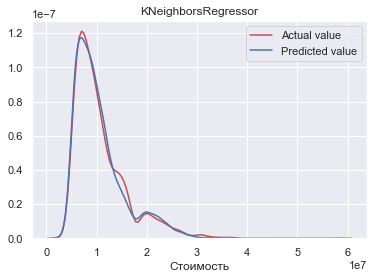

KNeighborsRegressor finished


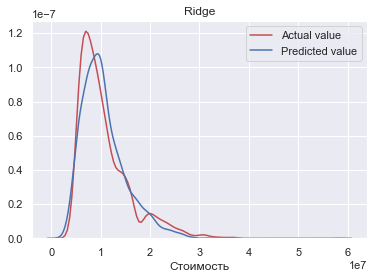

Ridge finished


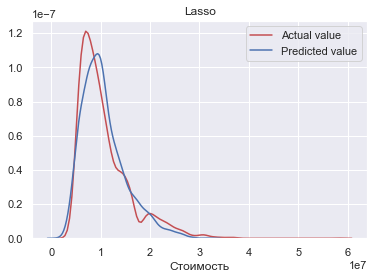

Lasso finished


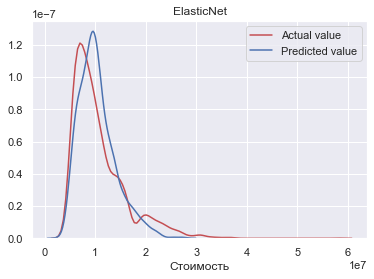

ElasticNet finished


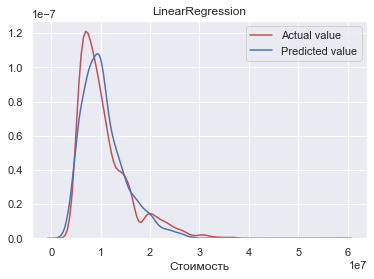

LinearRegression finished


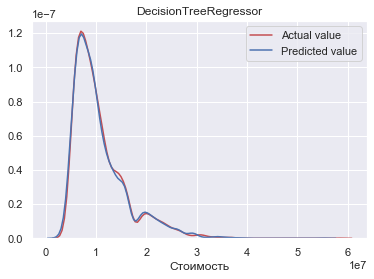

DecisionTreeRegressor finished


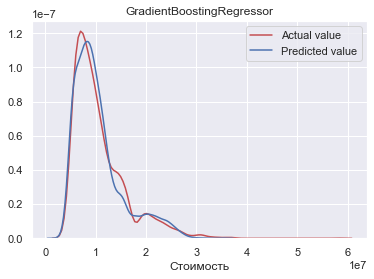

GradientBoostingRegressor finished


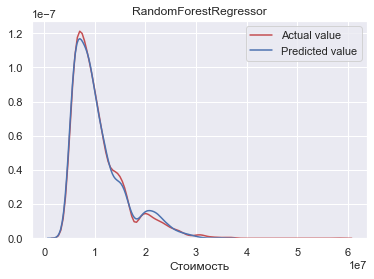

RandomForestRegressor finished


In [650]:
list_of_models = [
    KNeighborsRegressor, Ridge, Lasso, ElasticNet, LinearRegression, 
    DecisionTreeRegressor, GradientBoostingRegressor, RandomForestRegressor
]

df_scores = compare_models(x_train_encoded, y_train, 
    x_valid_encoded, y_valid, models=list_of_models)

In [651]:
df_scores

,model,mae,mse,rmse,r2_square
0,KNeighborsRegressor,9.846349e+05,3.462071e+12,1.860664e+06,0.875281
1,Ridge,1.421679e+06,5.461542e+12,2.336994e+06,0.803252
2,Lasso,1.421670e+06,5.461430e+12,2.336970e+06,0.803256
3,ElasticNet,1.601381e+06,6.916809e+12,2.629983e+06,0.750827
4,LinearRegression,1.421670e+06,5.461429e+12,2.336970e+06,0.803256
5,DecisionTreeRegressor,8.386809e+05,3.497115e+12,1.870058e+06,0.874019
6,GradientBoostingRegressor,1.112645e+06,3.765043e+12,1.940372e+06,0.864367
7,RandomForestRegressor,6.606257e+05,2.050245e+12,1.431868e+06,0.926141


#### Try on the test sample

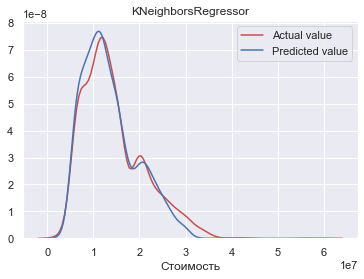

KNeighborsRegressor finished


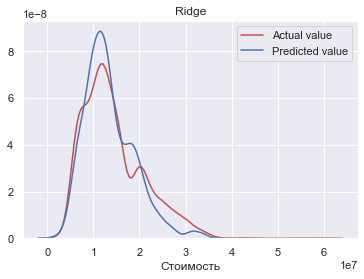

Ridge finished


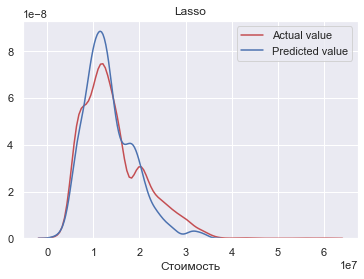

Lasso finished


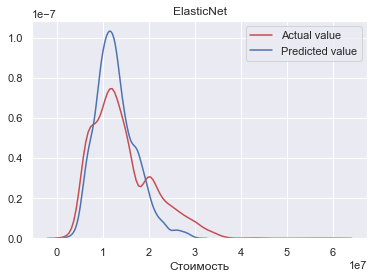

ElasticNet finished


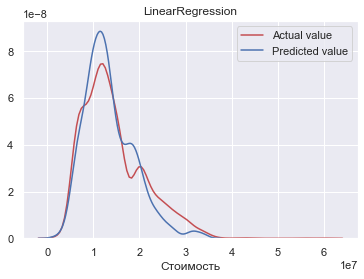

LinearRegression finished


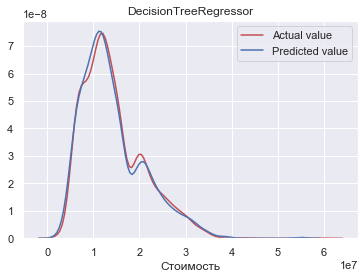

DecisionTreeRegressor finished


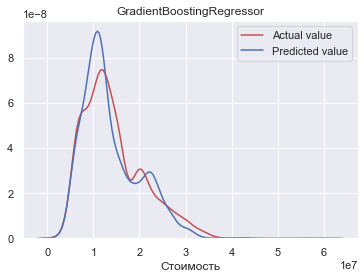

GradientBoostingRegressor finished


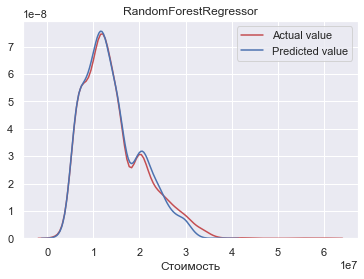

RandomForestRegressor finished


In [652]:
df_scores = compare_models(x_train_encoded, y_train, 
    x_test_encoded, y_test, models=list_of_models)

In [653]:
df_scores

,model,mae,mse,rmse,r2_square
0,KNeighborsRegressor,1.975056e+06,1.260025e+13,3.549684e+06,0.716220
1,Ridge,2.429558e+06,1.530697e+13,3.912413e+06,0.655260
2,Lasso,2.429547e+06,1.530682e+13,3.912393e+06,0.655263
3,ElasticNet,2.691965e+06,1.797413e+13,4.239591e+06,0.595191
4,LinearRegression,2.429547e+06,1.530682e+13,3.912393e+06,0.655263
5,DecisionTreeRegressor,1.759320e+06,1.376489e+13,3.710106e+06,0.689990
6,GradientBoostingRegressor,2.006446e+06,1.271186e+13,3.565370e+06,0.713706
7,RandomForestRegressor,1.375761e+06,7.830863e+12,2.798368e+06,0.823635
